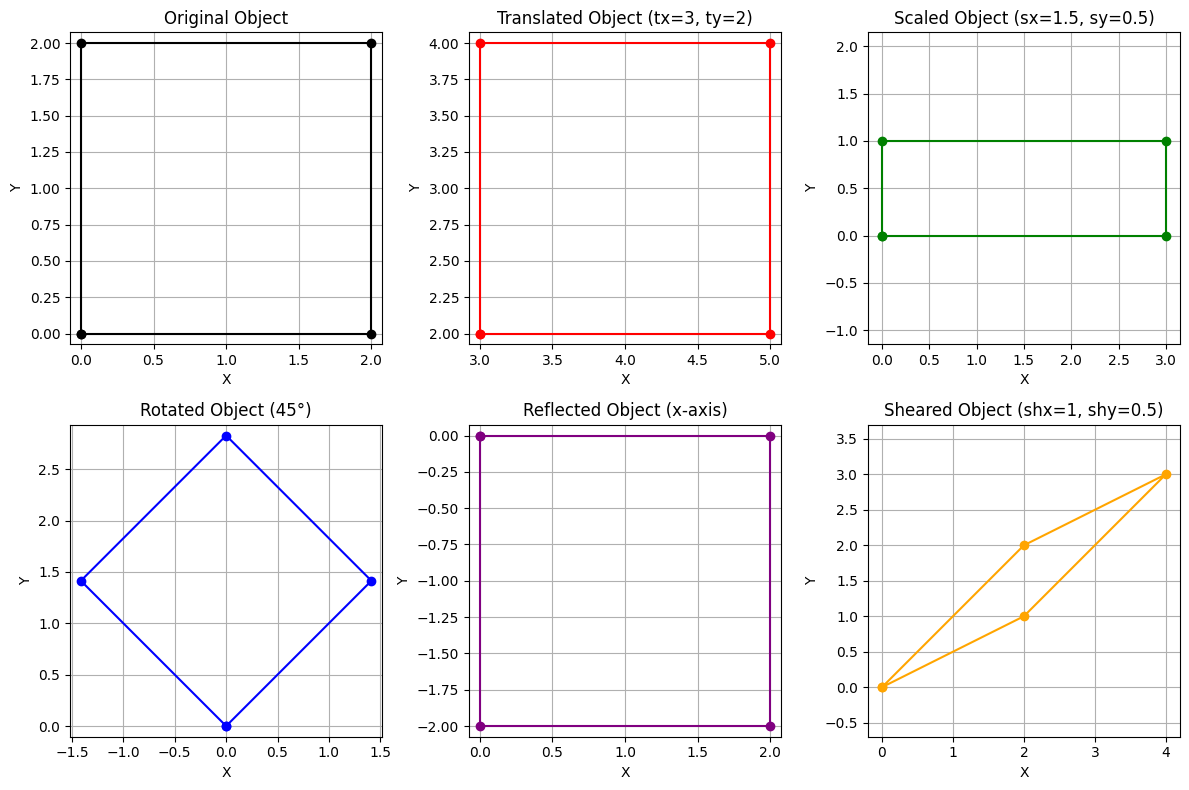

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_object(points, title, color='b'):
    points = np.vstack([points, points[0]])  # Close the shape
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')

def translate(points, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(points, translation_matrix)

def scale(points, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, scaling_matrix)

def rotate(points, angle):
    radians = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, rotation_matrix)

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'origin'.")
    return apply_transformation(points, reflection_matrix)

def shear(points, shx, shy):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, shearing_matrix)

def composite_transformation(points, transformations):
    composite_matrix = np.eye(3)
    for matrix in transformations:
        composite_matrix = np.dot(composite_matrix, matrix)
    return apply_transformation(points, composite_matrix)

def apply_transformation(points, transformation_matrix):
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points_homogeneous = np.dot(points_homogeneous, transformation_matrix.T)
    return transformed_points_homogeneous[:, :2]

# Example Usage
if __name__ == "__main__":
    # Define a square
    square = np.array([
        [0, 0],
        [2, 0],
        [2, 2],
        [0, 2]
    ])

    plt.figure(figsize=(12, 8))

    # Original Object
    plt.subplot(231)
    plot_object(square, "Original Object", color='black')

    # Translation
    translated_square = translate(square, tx=3, ty=2)
    plt.subplot(232)
    plot_object(translated_square, "Translated Object (tx=3, ty=2)", color='red')

    # Scaling
    scaled_square = scale(square, sx=1.5, sy=0.5)
    plt.subplot(233)
    plot_object(scaled_square, "Scaled Object (sx=1.5, sy=0.5)", color='green')

    # Rotation
    rotated_square = rotate(square, angle=45)
    plt.subplot(234)
    plot_object(rotated_square, "Rotated Object (45°)", color='blue')

    # Reflection
    reflected_square = reflect(square, axis='x')
    plt.subplot(235)
    plot_object(reflected_square, "Reflected Object (x-axis)", color='purple')

    # Shearing
    sheared_square = shear(square, shx=1, shy=0.5)
    plt.subplot(236)
    plot_object(sheared_square, "Sheared Object (shx=1, shy=0.5)", color='orange')


    plt.tight_layout()
    plt.show()


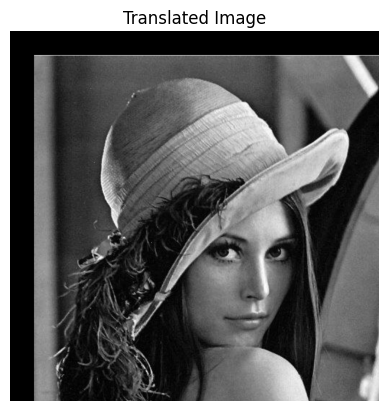

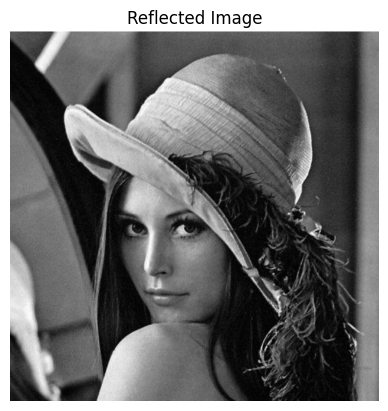

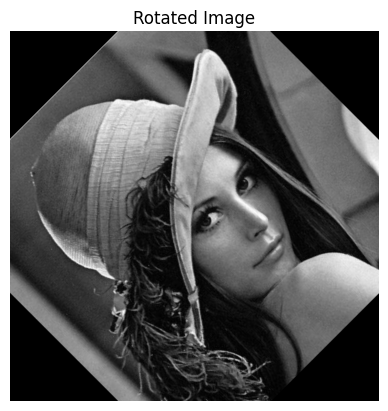

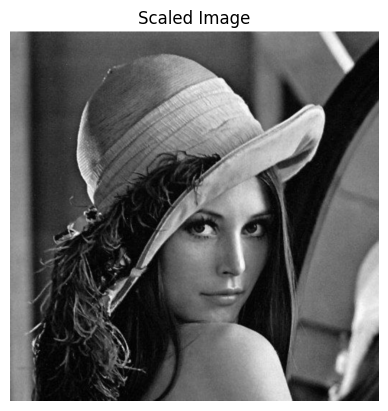

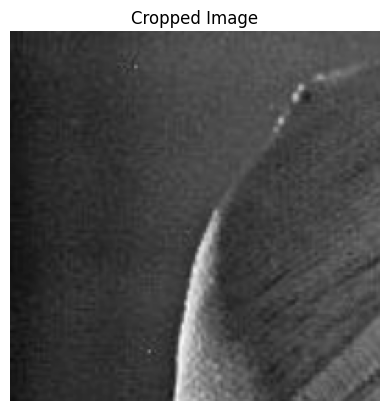

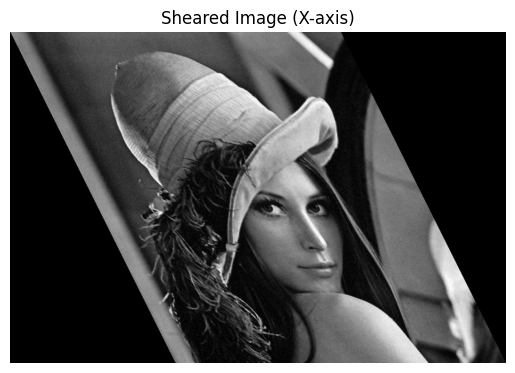

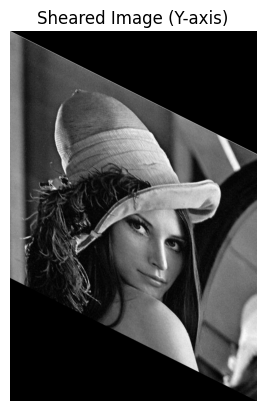

In [ ]:
#Task-2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/imageahahaha.png'
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("The image file was not found.")

# Convert to RGB for visualization in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to display images
def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(img, M, (cols, rows))
    return translated

translated_image = translate_image(image_rgb, 50, 50)
display_image("Translated Image", translated_image)

# 2. Image Reflection
def reflect_image(img):
    reflected = cv2.flip(img, 1)  # Flip around the y-axis
    return reflected

reflected_image = reflect_image(image_rgb)
display_image("Reflected Image", reflected_image)

# 3. Image Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated = cv2.warpAffine(img, M, (cols, rows))
    return rotated

rotated_image = rotate_image(image_rgb, 45)
display_image("Rotated Image", rotated_image)

# 4. Image Scaling
def scale_image(img, scale_x, scale_y):
    scaled = cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_image = scale_image(image_rgb, 1.5, 1.5)
display_image("Scaled Image", scaled_image)

# 5. Image Cropping
def crop_image(img, start_x, start_y, width, height):
    cropped = img[start_y:start_y + height, start_x:start_x + width]
    return cropped

cropped_image = crop_image(image_rgb, 50, 50, 200, 200)
display_image("Cropped Image", cropped_image)

# 6. Shearing in x-axis
def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_x = cv2.warpAffine(img, M, (cols + int(rows * shear_factor), rows))
    return sheared_x

sheared_x_image = shear_image_x(image_rgb, 0.5)
display_image("Sheared Image (X-axis)", sheared_x_image)

# 7. Shearing in y-axis
def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_y = cv2.warpAffine(img, M, (cols, rows + int(cols * shear_factor)))
    return sheared_y

sheared_y_image = shear_image_y(image_rgb, 0.5)
display_image("Sheared Image (Y-axis)", sheared_y_image)